In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
df_x = diabetes.data
df_y = diabetes.target

In [6]:
import numpy as np

df_x = np.array(df_x)
df_y = np.array(df_y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [29]:
n_features = X_train.shape[1]

W = np.random.randn(n_features)

b = 0.0

print("W (가중치):", W)
print("b (편향):", b)

W (가중치): [-0.59099522  1.83699839 -1.48892598 -0.29718621  1.61596381  1.29631673
  0.99167208  0.68251908 -1.21084931 -1.11331183]
b (편향): 0.0


In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(len(10)): 
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)  
    L = MSE(predictions, y)       
    return L

In [15]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    
    return dW, db

dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.87037139 -0.11053995 -4.99504281 -3.72058045 -1.32637221 -0.91379578
  3.12533125 -3.29383079 -4.49796265 -3.52919775]
db: -307.48009193890977


Iteration 10: Loss 29631.5576
Iteration 20: Loss 29537.4716
Iteration 30: Loss 29443.7610
Iteration 40: Loss 29350.4242
Iteration 50: Loss 29257.4598
Iteration 60: Loss 29164.8661
Iteration 70: Loss 29072.6418
Iteration 80: Loss 28980.7855
Iteration 90: Loss 28889.2955
Iteration 100: Loss 28798.1704
Iteration 110: Loss 28707.4089
Iteration 120: Loss 28617.0094
Iteration 130: Loss 28526.9705
Iteration 140: Loss 28437.2908
Iteration 150: Loss 28347.9688
Iteration 160: Loss 28259.0031
Iteration 170: Loss 28170.3922
Iteration 180: Loss 28082.1349
Iteration 190: Loss 27994.2295
Iteration 200: Loss 27906.6748
Iteration 210: Loss 27819.4694
Iteration 220: Loss 27732.6118
Iteration 230: Loss 27646.1006
Iteration 240: Loss 27559.9346
Iteration 250: Loss 27474.1122
Iteration 260: Loss 27388.6321
Iteration 270: Loss 27303.4930
Iteration 280: Loss 27218.6935
Iteration 290: Loss 27134.2323
Iteration 300: Loss 27050.1079
Iteration 310: Loss 26966.3191
Iteration 320: Loss 26882.8645
Iteration 330: Lo

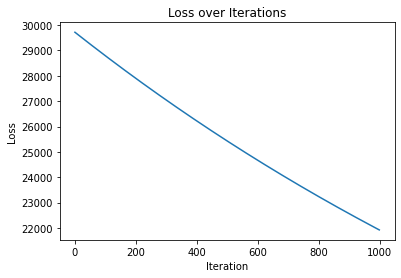

In [16]:
LEARNING_RATE = 0.0001
losses = []


for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
      
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db

    L = loss(X_train, W, b, y_train)
    
    losses.append(L)
    
    if i % 10 == 0:
        print(f'Iteration {i}: Loss {L:.4f}')


import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

Iteration 100: Loss 5385.245420
Iteration 200: Loss 4879.835888
Iteration 300: Loss 4504.291206
Iteration 400: Loss 4221.557286
Iteration 500: Loss 4005.569985
Iteration 600: Loss 3837.951299
Iteration 700: Loss 3705.703413
Iteration 800: Loss 3599.598722
Iteration 900: Loss 3513.055327
Iteration 1000: Loss 3441.351222
Iteration 1100: Loss 3381.074807
Iteration 1200: Loss 3329.740345
Iteration 1300: Loss 3285.518570
Iteration 1400: Loss 3247.047717
Iteration 1500: Loss 3213.300744
Iteration 1600: Loss 3183.491846
Iteration 1700: Loss 3157.010451
Iteration 1800: Loss 3133.374477
Iteration 1900: Loss 3112.197083
Iteration 2000: Loss 3093.162906
Iteration 2100: Loss 3076.010971
Iteration 2200: Loss 3060.522305
Iteration 2300: Loss 3046.510887
Iteration 2400: Loss 3033.816961
Iteration 2500: Loss 3022.302043
Iteration 2600: Loss 3011.845130
Iteration 2700: Loss 3002.339801
Iteration 2800: Loss 2993.691947
Iteration 2900: Loss 2985.817970
Iteration 3000: Loss 2978.643344
Iteration 3100: Los

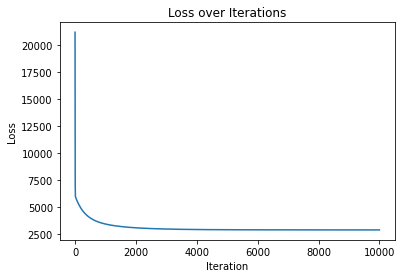

In [27]:
LEARNING_RATE = 0.1 # 학습율 조정
MAX_ITERATIONS = 10000  # 최대 반복 횟수
TOLERANCE = 1e-6  

W = np.random.randn(X_train.shape[1])
b = 0.0

losses = []

for i in range(1, MAX_ITERATIONS + 1):
    dW, db = gradient(X_train, W, b, y_train)
    
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
        print(f'Iteration {i}: Loss {L:.6f}')
    
    if L < TOLERANCE:
        print(f'Converged after {i} iterations with loss {L:.6f}')
        break


print(f'Final loss: {L:.6f}')

import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [24]:
y_test_pred = model(X_test, W, b)

test_loss = MSE(y_test, y_test_pred)

print(f'Test Loss (MSE): {test_loss:.6f}')

Test Loss (MSE): 2880.044388


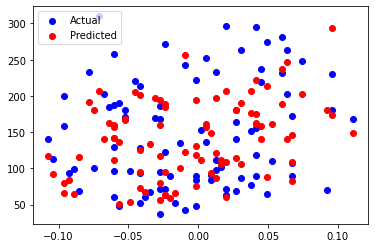

In [25]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_test_pred, color='red', label='Predicted')

plt.legend()
plt.show()

In [28]:
print("W (가중치):", W)
print("b (편향):", b)

W (가중치): [  39.94255693 -236.75281192  550.2047643   340.33490237  -98.48480556
 -126.83798681 -215.67551141  148.98337344  411.34676939   71.81687902]
b (편향): 151.30379965064733
